# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

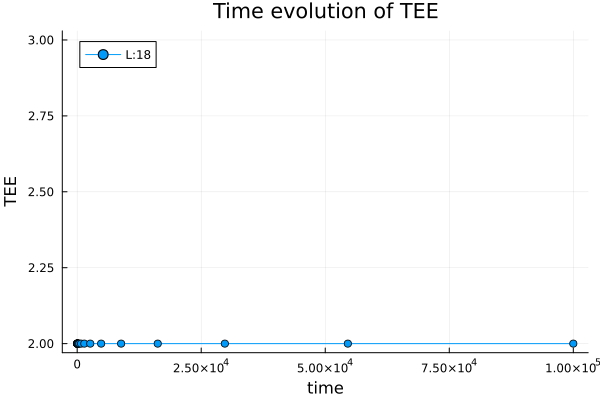

In [5]:
exp_index = 1
filename = "../Remote-Hydra/Toric_Code/data/test_TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")
p = plot(data["t_mmt"], data["TEE"][:, 1, 1], label="L:$(data["L"])", marker=:circle, xlabel="time", ylabel="TEE", title="Time evolution of TEE", legend=:topleft)
display(p)

In [11]:
all_data = []
for i in 1:400
    filename = "../Remote-Hydra/Toric_Code/data/test_TEE_exp:$(i).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,18,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,

15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,data sets read: 131

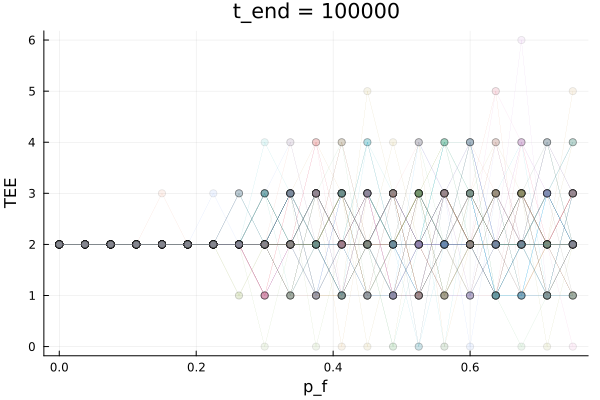

In [40]:
Observables_t_p  = []
model_data = all_data[1]
p = plot()
for data in all_data
    if data["L"] == 15
        push!(Observables_t_p, data["TEE"][:, :, :])
        plot!(p, data["p_f_arr"], data["TEE"][end, :, 1], marker=(:circle, 0.1), line=(false), xlabel="p_f", ylabel="TEE", legend=false, title="t_end = $(data["t_mmt"][end])")
    end
end
display(p)

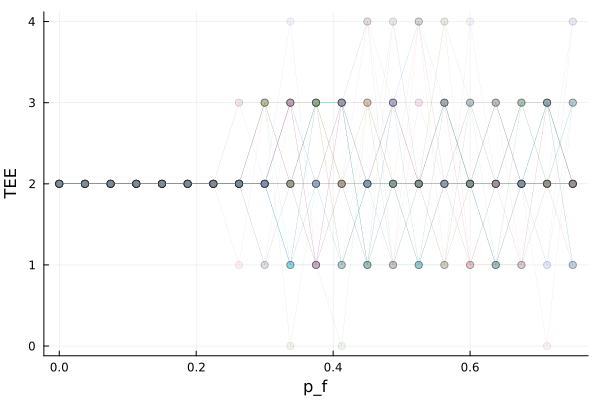

In [42]:
Observables_t_p  = []
model_data = all_data[1]
p = plot()
for data in all_data
    if data["L"] == 18
        push!(Observables_t_p, data["TEE"][:, :, :])
        plot!(p, data["p_f_arr"], data["TEE"][end, :, 1], marker=(:circle, 0.1), line=(false), xlabel="p_f", ylabel="TEE", legend=false)
    end
end
display(p)